In [1]:
from sympy.physics.mechanics import ReferenceFrame,Point,dynamicsymbols
from sympy.physics.mechanics import Point
from sympy import latex,pprint,symbols,init_printing
from sympy.algebras.quaternion import Quaternion
import numpy as np
init_printing() # Para visualizar símbolos

## 3. Cinemática de puntos

## 3.1 Velocidad y aceleración de puntos

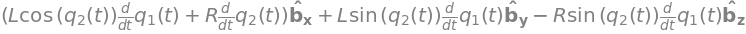

In [2]:
# Para el ejemplo de atracción de parque de diversiones
a=ReferenceFrame('A')
#Defina el punto O
o=Point('O')
# Parámetros del modelo
l,r=symbols('L,R')
# Variables de movimiento
q1,q2=dynamicsymbols('q1,q2')
# Marco de referencia intermedio E
e=a.orientnew('E','Axis',(q1,a.y))
# Marco de referencia intermedio B
b=e.orientnew('B','Axis',(q2,-e.z))
p=o.locatenew('P',l*b.z)
q=p.locatenew('Q',r*b.y)

#Calcule el vector desde el centro del eje de rotación del péndulo hasta el usuario
r_qo=q.pos_from(o)
#La velocidad del usuario es:
r_qo.dt(a)
#La aceleración del usuario es:
#r_qo.dt(a).dt(a).subs(q2.diff().diff(),0).simplify()

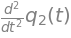

In [3]:
q2.diff().diff()

## 3.2 Velocidad y aceleración de puntos fijos en un cuerpo

In [4]:
# Para el ejemplo de atracción de parque de diversiones
a=ReferenceFrame('A')
#Defina el punto O
o=Point('O')
# Parámetros del modelo
l,r=symbols('L,R')
# Variables de movimiento
q1,q2=dynamicsymbols('q1,q2')
# Marco de referencia intermedio E
e=a.orientnew('E','Axis',(q1,a.y))
# Marco de referencia intermedio B
b=e.orientnew('B','Axis',(q2,-e.z))
p=o.locatenew('P',l*b.z)
q=p.locatenew('Q',r*b.y)

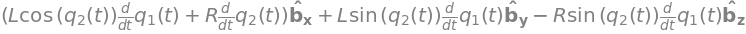

In [5]:
#Utilice el método v2pt_theory para calcular la velocidad de un punto con la velocidad 
#de otro punto fijo en el mismo marco.
#Primero defina la velocidad de O en el marco A, y de P en B como 0 ya que son puntos fijos en estos
#marcos.
o.set_vel(a,0)
p.set_vel(b,0)
#Luego utilice v2pt_theory para definir la velocidad de P en a respecto al punto O
p.v2pt_theory(o,a,b)
#Ahora utilice v2pt_theory para definir la velocidad de Q en a respecto al punto P
q.v2pt_theory(p,a,b)
#Observe que el resultado es el mismo que calculando la derivada total de r_qo
#Ahora pruebe utilizar el metodo a2pt_theory para calcular la aceleracion

## 3.3 Velocidad y aceleración de puntos móviles sobre un cuerpo

d
──(q₃(t)) b_x
dt


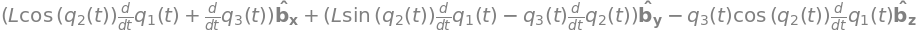

In [6]:
# Modificamos el ejemplo de atracción de parque de diversiones para incluir la variable
# q3.
a=ReferenceFrame('A')
#Defina el punto O
o=Point('O')
# Parametros del modelo
l,r=symbols('L,R')
# Variables de movimiento
q1,q2,q3=dynamicsymbols('q1,q2,q3')
# Marco de referencia intermedio E
e=a.orientnew('E','Axis',(q1,a.y))
# Marco de referencia B
b=e.orientnew('B','Axis',(q2,-e.z))
p=o.locatenew('P',l*b.z)
q=p.locatenew('Q',q3*b.x) 
#Esperamos que q3<R por el bien del usuario de la atracción :)

#Primero defina la velocidad de O en el marco A, y de P en B como 0 ya que son puntos fijos en estos
#marcos.
o.set_vel(a,0)
p.set_vel(b,0)
#Luego utilice v2pt_theory para definir la velocidad de P en a respecto al punto O
p.v2pt_theory(o,a,b)
#Ya no deberiamos utilizar v2pt_theory para definir la velocidad de Q puesto que
#no es un punto fijo en B.
#Dado que q fue definido en coordenadas de B, ya tiene la velocidad definida en este marco.
#Verifique
pprint(q.vel(b))
#Ahora utilizamos v1pt_theory para encontrar la velocidad de q
q.v1pt_theory(p,a,b)